# Цель лабораторной 
Изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

# Задание
Требуется выполнить следующие действия:

* Выбрать набор данных (датасет) содержащий категориальные и числовые признаки и пропуски в данных.
* Для выбранного датасета решить следующие задачи:

    1. устранение пропусков в данных;
    2. кодирование категориальных признаков;
    3. нормализацию числовых признаков.


# Текст программы и экранные формы

## Загрузка и предобработка данных

Воспользуемся датасетом с первой лабораторной работы для решения вышеперечисленных задач.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_loaded = pd.read_csv('who_life_exp.csv', sep=",")

Выведем количество строк/столбцов и часть набора данных.

In [2]:
data_loaded.shape

(3111, 32)

In [3]:
data_loaded.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


In [4]:
# Вычислим процент пропущенных значений
[(c, data_loaded[c].isnull().mean() * 100) for c in data_loaded]

[('country', 0.0),
 ('country_code', 0.0),
 ('region', 0.0),
 ('year', 0.0),
 ('life_expect', 0.0),
 ('life_exp60', 0.0),
 ('adult_mortality', 0.0),
 ('infant_mort', 0.0),
 ('age1-4mort', 0.0),
 ('alcohol', 1.6072002571520412),
 ('bmi', 1.092896174863388),
 ('age5-19thinness', 1.092896174863388),
 ('age5-19obesity', 1.092896174863388),
 ('hepatitis', 18.289938926390228),
 ('measles', 0.6107360977177756),
 ('polio', 0.6107360977177756),
 ('diphtheria', 0.6107360977177756),
 ('basic_water', 1.0286081645773062),
 ('doctors', 42.783670845387334),
 ('hospitals', 95.8212793314047),
 ('gni_capita', 21.92221150755384),
 ('gghe-d', 3.2144005143040824),
 ('che_gdp', 3.7608486017357765),
 ('une_pop', 1.1893281902925106),
 ('une_infant', 0.0),
 ('une_life', 0.0),
 ('une_hiv', 23.81870781099325),
 ('une_gni', 3.7608486017357765),
 ('une_poverty', 70.65252330440373),
 ('une_edu_spend', 41.3371906139505),
 ('une_literacy', 81.64577306332369),
 ('une_school', 74.12407585985214)]

Данные представляют собой выгрузку с серверов «Глобальной обсерватории здравоохранения»(GHO) и ЮНЕСКО за шестнадь лет (2000 - 2016). Воспользуемся данными с серверов GHO, так как они наиболее полные и параметром une_gni из набора данных ЮНЕСКО.

In [5]:
data = data_loaded[['country', 'country_code','region','year','life_expect','adult_mortality', 'infant_mort','alcohol','bmi','basic_water','doctors','hospitals','une_gni']]

In [6]:
data.head()

,country,country_code,region,year,life_expect,adult_mortality,infant_mort,alcohol,bmi,basic_water,doctors,hospitals,une_gni
0,Angola,AGO,Africa,2000,47.33730,383.5583,0.137985,1.47439,21.7,41.14431,NaN,NaN,2530.0
1,Angola,AGO,Africa,2001,48.19789,372.3876,0.133675,1.94025,21.8,42.25467,NaN,NaN,2630.0
2,Angola,AGO,Africa,2002,49.42569,354.5147,0.128320,2.07512,21.9,43.37680,NaN,NaN,3180.0
3,Angola,AGO,Africa,2003,50.50266,343.2169,0.122040,2.20275,22.0,44.36387,NaN,NaN,3260.0
4,Angola,AGO,Africa,2004,51.52863,333.8711,0.115700,2.41274,22.2,45.35134,0.621,NaN,3560.0


## Устранение пропусков в данных

In [7]:
# Вычислим процент пропущенных значений
[(c, data[c].isnull().mean() * 100) for c in data]

[('country', 0.0),
 ('country_code', 0.0),
 ('region', 0.0),
 ('year', 0.0),
 ('life_expect', 0.0),
 ('adult_mortality', 0.0),
 ('infant_mort', 0.0),
 ('alcohol', 1.6072002571520412),
 ('bmi', 1.092896174863388),
 ('basic_water', 1.0286081645773062),
 ('doctors', 42.783670845387334),
 ('hospitals', 95.8212793314047),
 ('une_gni', 3.7608486017357765)]

Удалим колонки с преобладающими пропусками

In [8]:
data = data.drop(['doctors','hospitals'],axis='columns')

Заполним пропущенные данные для параметров alcohol, bmi, basic_water одним из показателей центра распределения — средним значением.

In [9]:
data['alcohol'].fillna((data['alcohol'].mean()), inplace=True)

In [10]:
data['bmi'].fillna((data['alcohol'].mean()), inplace=True)

In [11]:
data['basic_water'].fillna((data['alcohol'].mean()), inplace=True)

In [12]:
data['une_gni'].fillna((data['une_gni'].mean()), inplace=True)

In [13]:
# Вычислим процент пропущенных значений
[(c, data[c].isnull().mean() * 100) for c in data]

[('country', 0.0),
 ('country_code', 0.0),
 ('region', 0.0),
 ('year', 0.0),
 ('life_expect', 0.0),
 ('adult_mortality', 0.0),
 ('infant_mort', 0.0),
 ('alcohol', 0.0),
 ('bmi', 0.0),
 ('basic_water', 0.0),
 ('une_gni', 0.0)]

In [14]:
data.head()

,country,country_code,region,year,life_expect,adult_mortality,infant_mort,alcohol,bmi,basic_water,une_gni
0,Angola,AGO,Africa,2000,47.33730,383.5583,0.137985,1.47439,21.7,41.14431,2530.0
1,Angola,AGO,Africa,2001,48.19789,372.3876,0.133675,1.94025,21.8,42.25467,2630.0
2,Angola,AGO,Africa,2002,49.42569,354.5147,0.128320,2.07512,21.9,43.37680,3180.0
3,Angola,AGO,Africa,2003,50.50266,343.2169,0.122040,2.20275,22.0,44.36387,3260.0
4,Angola,AGO,Africa,2004,51.52863,333.8711,0.115700,2.41274,22.2,45.35134,3560.0


In [15]:
data.shape

(3111, 11)

## Кодирование категориальных признаков

Выполним кодирование категорий целочисленными значениями для колонки "Регион"

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['region'])

In [18]:
data['region'].unique()

array(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'], dtype=object)

In [19]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5])

In [20]:
le.inverse_transform([0, 1, 2, 3])

array(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe'],
      dtype=object)

В результате 0 регион соответствует 'Africa', 1 - 'Americas', 2 - 'Eastern Mediterranean' и 3  - 'Europe'.

## Нормализация числовых признаков

Вывыдем гистаграммы плотности.

In [21]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

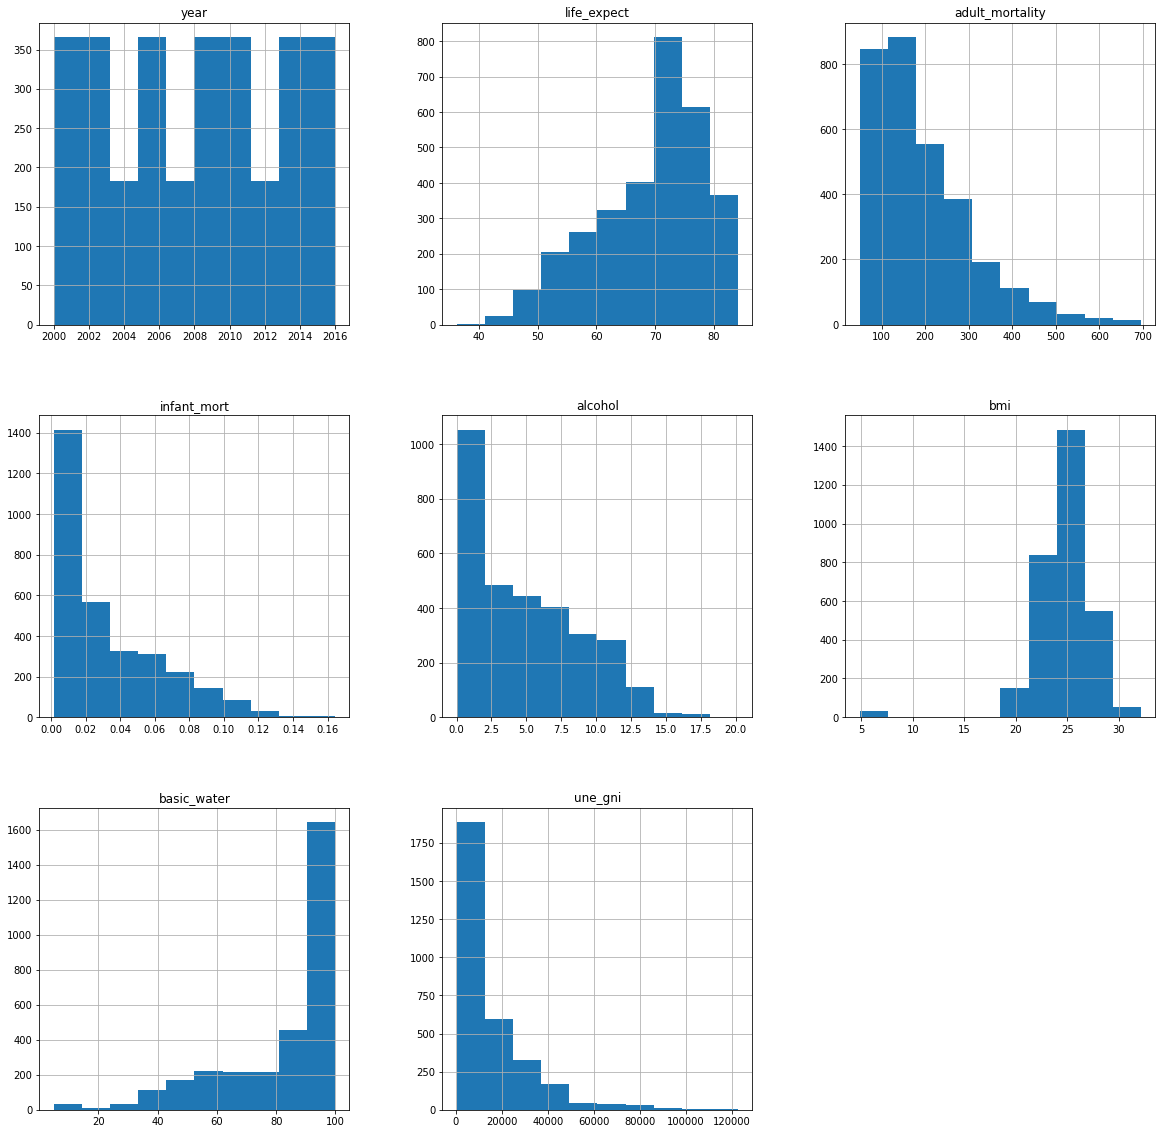

In [22]:
data.hist(figsize=(20,20))
plt.show()

Отобразим график квантиль-квантиль для визуального оценки близости распределения к нормальному.

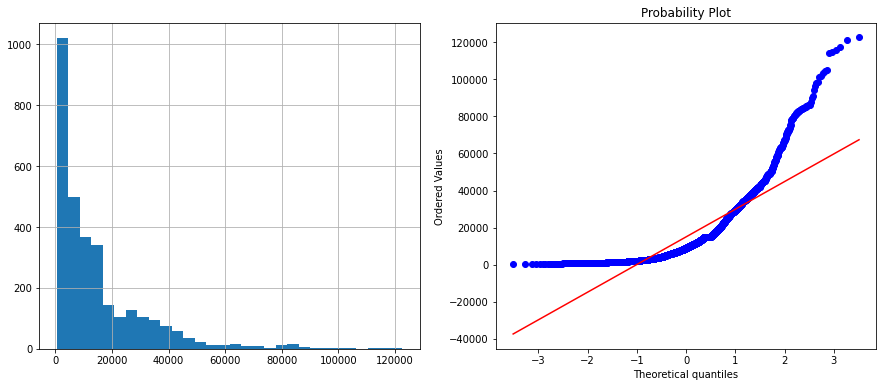

In [23]:
diagnostic_plots(data, 'une_gni')

Выведем наиболее удачные методы нормализация числового признака 'une_gni'

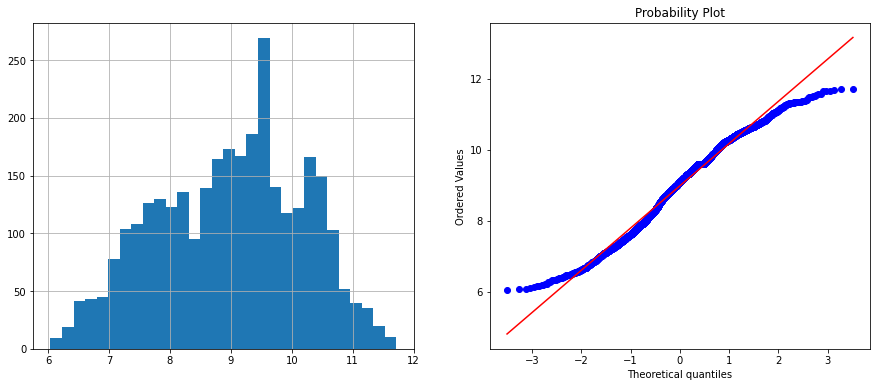

In [33]:
#логарифмируем
data['GrLivArea_log'] = np.log(data['une_gni'])
diagnostic_plots(data, 'GrLivArea_log')

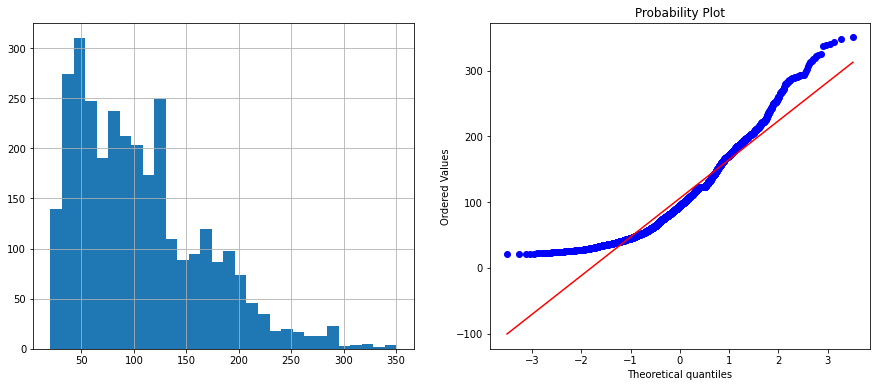

In [35]:
# квадратный корень
data['GrLivArea_sqr'] = data['une_gni']**(1/2) 
diagnostic_plots(data, 'GrLivArea_sqr')

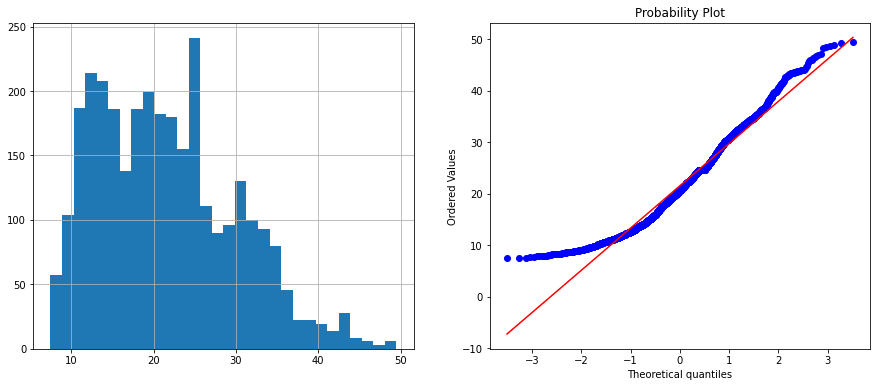

In [38]:
#возведение в степень(кубический корень)
data['GrLivArea_exp3'] = data['une_gni']**(0.333)
diagnostic_plots(data, 'GrLivArea_exp3')

Оптимальное значение λ = 0.07254153648769908


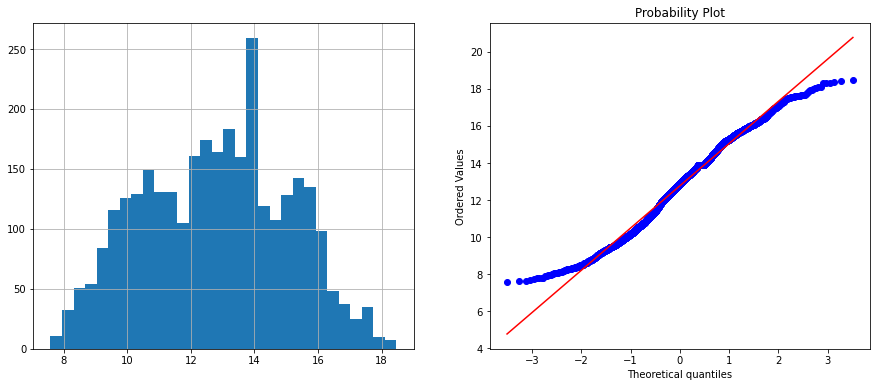

In [39]:
#преобразование Бокса-Кокса
data['GrLivArea_boxcox'], param = stats.boxcox(data['une_gni']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'GrLivArea_boxcox')

Для параметра une_gni(Валовый Национальный Доход на душу населения) наиболее удачные методы нормализации - логарифмирование и преобразование Бокса-Кокса.
ВНД сильно раличается в разных странах, поэтому при логарифмировании эти различия уменьшаются. 